Standardize
* naming of files
* metadata of .nc files, make sure this is detailed

In [1]:
import os

# Define the directory containing your .nc files
directory = '/content/'


file_mapping = {
    "Rayleigh_Phase_10mHz.5m_EASE9262.68m.nc": "rayleigh_phase",
    "IGRF_inc_grid.nc": "igrf_inc",
    "interpolated_bouguer_from_csv.nc": "interpolated_bouguer",
    "interpolated_MF7_from_csv.nc": "interpolated_mf7",
    "SC_CRUST_VP_MS_CRUST1s.5m_EASE9262.68m.nc": "sc_crust_vp",
    "WGM2012_Freeair_ponc.5m_EASE9262.68m.nc": "wgm2012_freeair_ponc",
    "GL_TOT_SED_THICK_M_GLOBSED_Straume.5m_EASE9262.68m.nc": "gl_tot_sed_thick",
    "Love_Phase_10mHz.5m_EASE9262.68m.nc": "love_phase",
    "Rayleigh_Group_10mHz.5m_EASE9262.68m.nc": "rayleigh_group",
    "IGRF_dec_grid.nc": "igrf_dec",
    "SC_CRUST_AGE_MA_Seton2020.5m_EASE9262.68m.nc": "sc_crust_age",
    "SC_CRUST_VS_MS_CRUST1s.5m_EASE9262.68m.nc": "sc_crust_vs",
    "CM_CURIE_POINT_DEPTH_KM_Li2017.5m_EASE9262.68m.nc": "cm_curie_point_depth",
    "GL_ELEVATION_M_ASL_SRTM15+V2.5m_EASE9262.68m.nc": "gl_elevation",
    "SL_VGG_EOT.5m_EASE9262.68m.nc": "sl_vgg_eot",
    "SC_CRUST_DEN_KGM3_CRUST1s.5m_EASE9262.68m.nc": "sc_crust_den",
    "interpolated_EMM_from_csv.nc": "interpolated_emm",
    "Love_Group_10mHz.5m_EASE9262.68m.nc": "love_group",
    'sed_thick_filled.nc': 'gl_tot_sed_thick'

}



# Function to rename files
def rename_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.nc'):
            # Example of extracting parts from the filename or manually defining them
            try:
              variable_name = file_mapping[filename]
            except KeyError:
              print(f"No mapping found for {filename}")
              continue
            resolution = '100km^2'

            # Create a new filename
            if 'interpolated' in variable_name:
              new_filename = f"interpolated_{variable_name}_{resolution}.nc"
            elif variable_name == 'gl_tot_sed_thick':
              new_filename = f"sed_thick_filled_{resolution}.nc"
            else:
              new_filename = f"{variable_name}_{resolution}.nc"

            # Construct full file paths
            old_file = os.path.join(directory, filename)
            new_file = os.path.join(directory, new_filename)

            # Rename the file
            os.rename(old_file, new_file)
            print(f"Renamed {old_file} to {new_file}")

rename_files(directory)


Renamed /content/interpolated_MF7_from_csv.nc to /content/interpolated_interpolated_mf7_100km^2.nc
Renamed /content/SC_CRUST_VP_MS_CRUST1s.5m_EASE9262.68m.nc to /content/sc_crust_vp_100km^2.nc
Renamed /content/IGRF_dec_grid.nc to /content/igrf_dec_100km^2.nc
Renamed /content/WGM2012_Freeair_ponc.5m_EASE9262.68m.nc to /content/wgm2012_freeair_ponc_100km^2.nc
Renamed /content/IGRF_inc_grid.nc to /content/igrf_inc_100km^2.nc
Renamed /content/Rayleigh_Group_10mHz.5m_EASE9262.68m.nc to /content/rayleigh_group_100km^2.nc
Renamed /content/Rayleigh_Phase_10mHz.5m_EASE9262.68m.nc to /content/rayleigh_phase_100km^2.nc
No mapping found for interpolated_emag_from_csv.nc
Renamed /content/interpolated_EMM_from_csv.nc to /content/interpolated_interpolated_emm_100km^2.nc
No mapping found for MF7_filled_EMAG.nc
Renamed /content/GL_TOT_SED_THICK_M_GLOBSED_Straume.5m_EASE9262.68m.nc to /content/sed_thick_filled_100km^2.nc
Renamed /content/SL_VGG_EOT.5m_EASE9262.68m.nc to /content/sl_vgg_eot_100km^2.nc
Re

In [2]:
import xarray as xr


# Function to add metadata and rename variables uniformly
def add_metadata(filepath, new_variable_name, resolution, date):
    # Open the NetCDF file
    try:
        ds = xr.open_dataset(filepath)
    except:
        print(f"Failed to open {filepath}")
        return None

    # Add global attributes
    ds.attrs['resolution'] = resolution
    ds.attrs['source'] = 'MagNav Magnetic Anomaly Prediction Project'
    ds.attrs['date'] = date

    # Rename all variables to the new name
    new_vars = {var_name: new_variable_name for var_name in ds.data_vars}
    ds = ds.rename_vars(new_vars)

    # Save the modified dataset
    ds.to_netcdf(filepath)
    ds.close()
    print(f"Metadata added and all variables renamed to '{new_variable_name}' in {filepath}")

# Example usage
directory = '/content/'

for filename in os.listdir(directory):
    if filename.endswith('.nc'):
        add_metadata(os.path.join(directory, filename), 'z', '100km^2', '2024-07-15')



Metadata added and all variables renamed to 'z' in /content/interpolated_interpolated_mf7_100km^2.nc
Metadata added and all variables renamed to 'z' in /content/sl_vgg_eot_100km^2.nc
Metadata added and all variables renamed to 'z' in /content/love_phase_100km^2.nc
Metadata added and all variables renamed to 'z' in /content/interpolated_interpolated_emm_100km^2.nc
Metadata added and all variables renamed to 'z' in /content/sc_crust_vp_100km^2.nc
Metadata added and all variables renamed to 'z' in /content/interpolated_emag_from_csv.nc
Metadata added and all variables renamed to 'z' in /content/sc_crust_den_100km^2.nc
Metadata added and all variables renamed to 'z' in /content/interpolated_interpolated_bouguer_100km^2.nc
Metadata added and all variables renamed to 'z' in /content/MF7_filled_EMAG.nc
Metadata added and all variables renamed to 'z' in /content/sed_thick_filled_100km^2.nc
Metadata added and all variables renamed to 'z' in /content/sc_crust_age_100km^2.nc
Metadata added and al

In [6]:
#download all files ending in .nc
import os

directory = '/content/'

for filename in os.listdir(directory):
    if filename.endswith('.nc'):
        file_path = os.path.join(directory, filename)
        #download the files
        from google.colab import files
        files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plotting Predictor and Target Grids
Plotting to ensure all predictors and the target are processed correctly before grid selections/model use

## Predictors

interpolated_interpolated_mf7_100km^2.nc


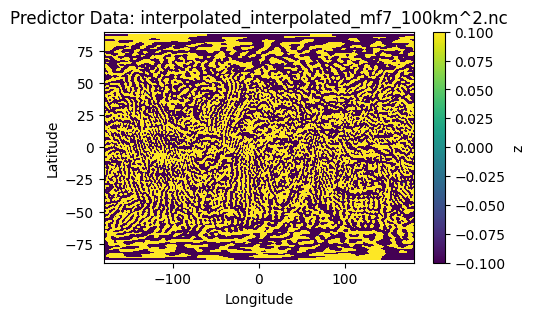

sl_vgg_eot_100km^2.nc


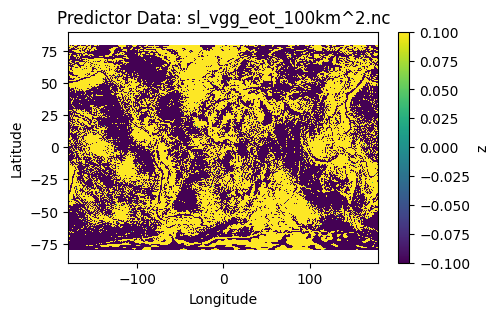

love_phase_100km^2.nc


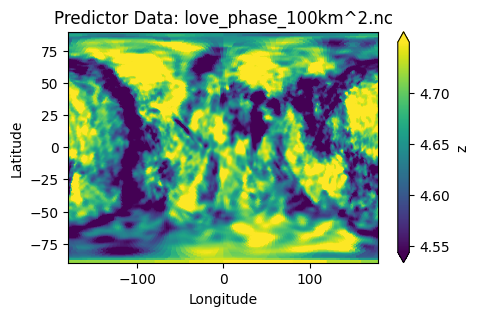

interpolated_interpolated_emm_100km^2.nc


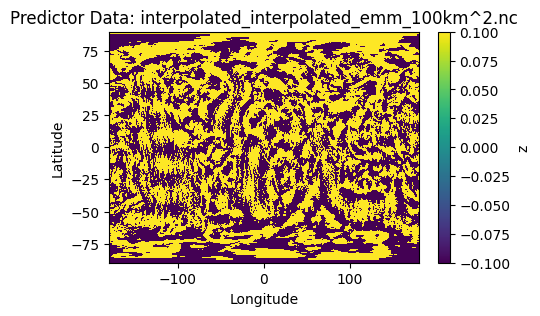

sc_crust_vp_100km^2.nc


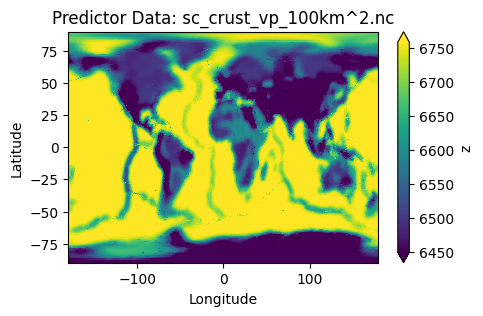

sc_crust_den_100km^2.nc


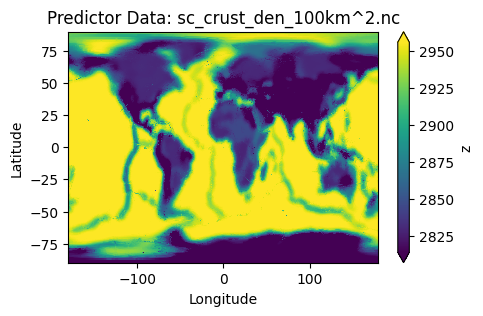

interpolated_interpolated_bouguer_100km^2.nc


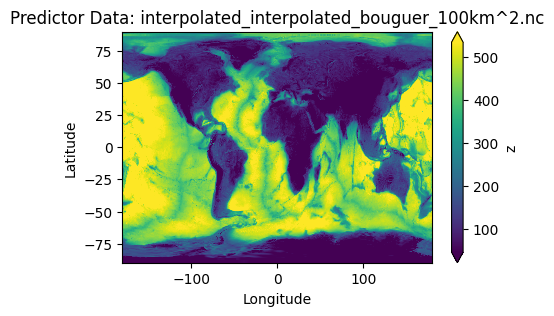

MF7_filled_EMAG.nc


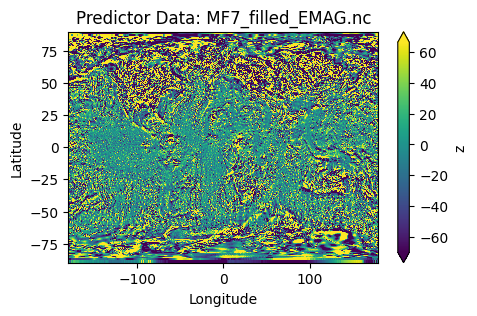

sed_thick_filled_100km^2.nc


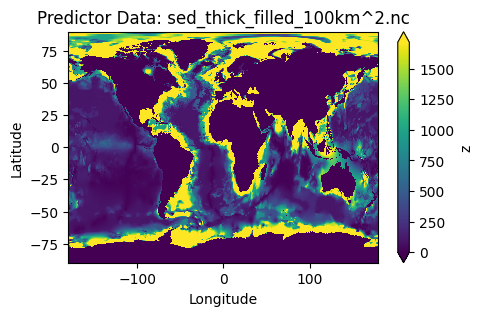

sc_crust_age_100km^2.nc


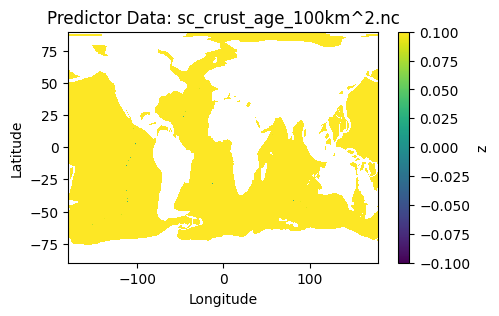

cm_curie_point_depth_100km^2.nc


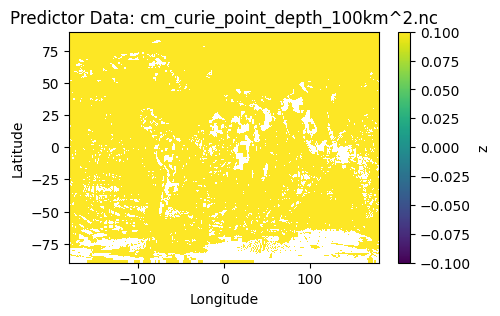

gl_elevation_100km^2.nc


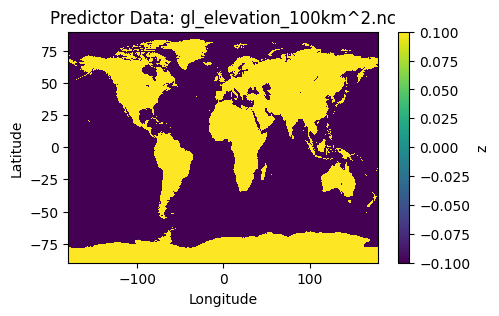

love_group_100km^2.nc


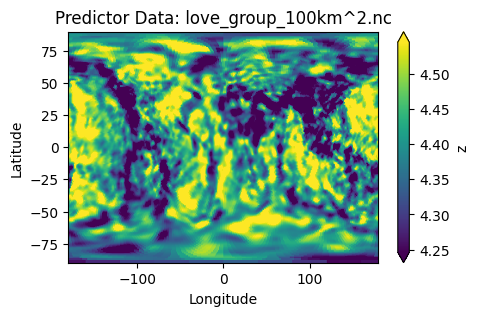

rayleigh_phase_100km^2.nc


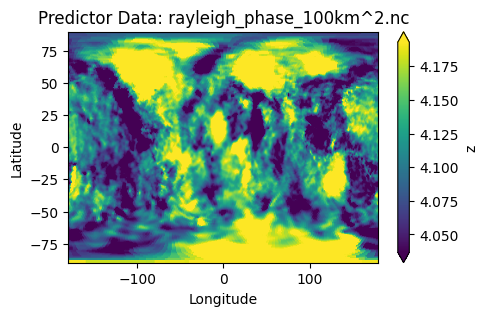

igrf_dec_100km^2.nc


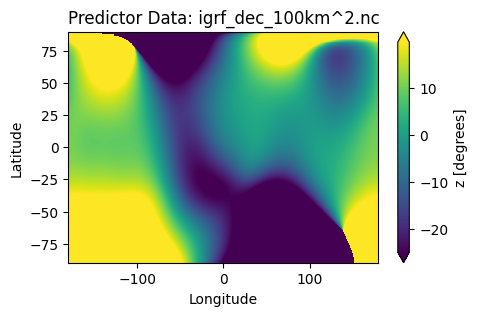

sc_crust_vs_100km^2.nc


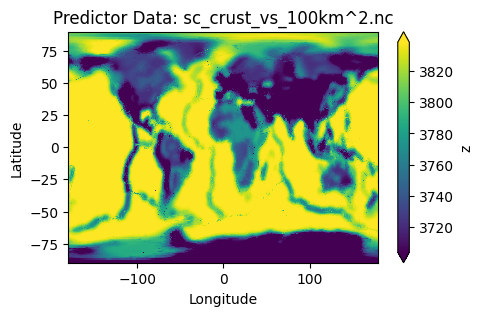

rayleigh_group_100km^2.nc


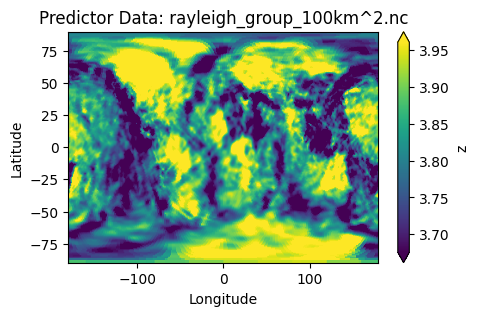

wgm2012_freeair_ponc_100km^2.nc


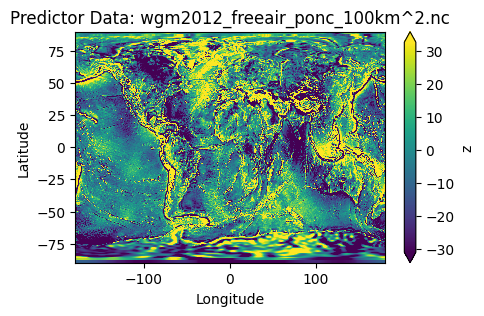

igrf_inc_100km^2.nc


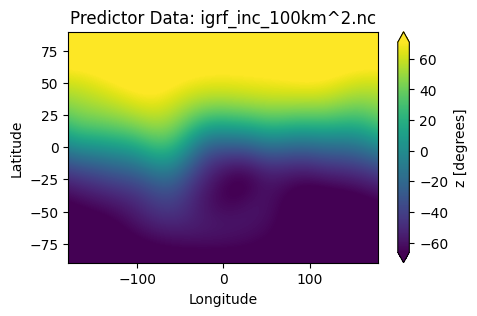

In [10]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import xarray as xr
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

# Define the path to the predictors folder on Google Drive
predictors_folder = '/content/'

# List all files in the predictors folder
files = os.listdir(predictors_folder)

ranking_list = []

# Iterate over each file in the predictors folder
for file_name in files:
    file_path = os.path.join(predictors_folder, file_name)

    # Skip the emag target file itself
    if file_name == 'interpolated_emag_from_csv.nc' or not file_name.endswith('.nc'):
        continue

    # Open the predictor file
    data_array = xr.open_dataset(file_path)

    # Calculate standard deviation
    std_dev = np.std(data_array['z'].values.flatten())


  # Plot the predictor data array
    plt.figure(figsize=(5, 3))
    print(file_name)
    if file_name == '/content/CM_CURIE_POINT_DEPTH_KM_Li2017.5m_EASE9262.68m.nc':
      data_array['z'].plot( cmap='viridis')
    else:
      data_array['z'].plot( vmin =np.percentile(data_array['z'], 10), vmax=np.percentile(data_array['z'], 90), cmap='viridis')
    plt.title(f'Predictor Data: {file_name}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()




Plot of our target variable emag

## Target

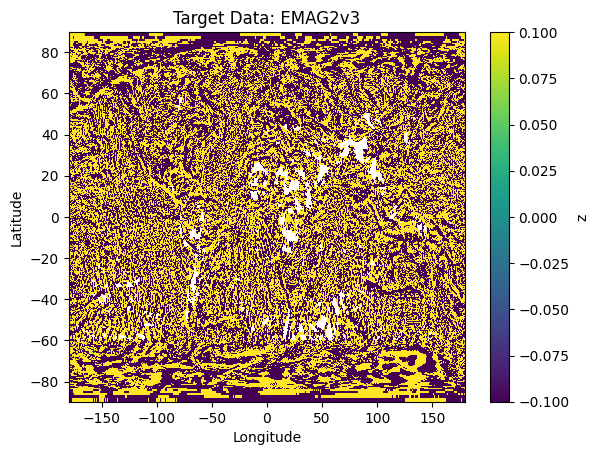

(array([1.52550244e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.52550244e-08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

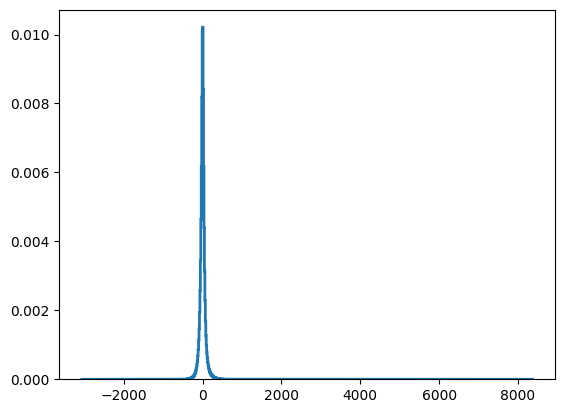

In [19]:
emag = xr.open_dataset('/content/interpolated_emag_from_csv.nc')
scaler = StandardScaler()

processed_emag = xr.DataArray( emag['z'], dims=['lat','lon'], coords= {'lat': emag['lat'].values.flatten(), 'lon': emag['lon'].values.flatten()})

processed_emag.plot(vmin=np.percentile(emag['z'], 10), vmax=np.percentile(emag['z'], 90), cmap='viridis')
plt.title('Target Data: EMAG2v3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()